In [1]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
path = './Data/data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,age,antiquity,salary,state,area_CUSTOMER SUCCESS,area_TALENT POOL,area_GROWTH,area_PEOPLE DEVELOPMENT,area_RETAIL_FINANCIAL_BD,...,chapter_AGILISMO,chapter_RESEARCH,chapter_TI,seniority_ADVANCED,seniority_JUNIOR,seniority_SENIOR,seniority_MASTER,seniority_TRAINEE,sex_MASCULINO,sex_FEMENINO
0,005428920349380a73fff626ecfac47c,-0.444944,-0.360950,-0.312274,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,005c436c2cd0d824eac8fc7047198308,1.962052,1.314380,7.128367,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,006701a9d6145ecc61ddc3092eb9a004,-0.896256,-0.675075,-0.812593,retired,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,00b318b70e0d319f307952f5f7eca2bf,-0.745819,0.057882,0.072587,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,00cea163e55ecbadfbf41a8217d46140,0.156805,2.570878,-0.464679,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df = df.drop('id', axis=1)

In [5]:
df

,age,antiquity,salary,state,area_CUSTOMER SUCCESS,area_TALENT POOL,area_GROWTH,area_PEOPLE DEVELOPMENT,area_RETAIL_FINANCIAL_BD,area_PRAGMA_REGIONES,...,chapter_AGILISMO,chapter_RESEARCH,chapter_TI,seniority_ADVANCED,seniority_JUNIOR,seniority_SENIOR,seniority_MASTER,seniority_TRAINEE,sex_MASCULINO,sex_FEMENINO
0,-0.444944,-0.360950,-0.312274,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.962052,1.314380,7.128367,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.896256,-0.675075,-0.812593,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.745819,0.057882,0.072587,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.156805,2.570878,-0.464679,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1.753983,-0.363901,-0.052932,retired,0.872303,0.0,0.0,0.0,0.127697,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1884,1.139166,-0.610737,-0.659150,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1885,0.101406,-0.195577,0.079306,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1886,-1.192005,-0.527140,-0.568813,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:

X = df.drop('state', axis=1)
Y = pd.get_dummies(df['state'], prefix='state', drop_first=True)
Y = Y.rename(columns={'state_retired' : 'state'})

In [7]:
X.head()

,age,antiquity,salary,area_CUSTOMER SUCCESS,area_TALENT POOL,area_GROWTH,area_PEOPLE DEVELOPMENT,area_RETAIL_FINANCIAL_BD,area_PRAGMA_REGIONES,area_AWS PREMIER,...,chapter_AGILISMO,chapter_RESEARCH,chapter_TI,seniority_ADVANCED,seniority_JUNIOR,seniority_SENIOR,seniority_MASTER,seniority_TRAINEE,sex_MASCULINO,sex_FEMENINO
0,-0.444944,-0.360950,-0.312274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.962052,1.314380,7.128367,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.896256,-0.675075,-0.812593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.745819,0.057882,0.072587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.156805,2.570878,-0.464679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
Y.head(10)

,state
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [10]:
df['state'].head(10)

0     active
1     active
2    retired
3     active
4     active
5     active
6     active
7    retired
8     active
9     active
Name: state, dtype: object

In [11]:
Y.value_counts()

state
0        944
1        944
dtype: int64

# Train-Test split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Baseline model: LogisticRegression

In [24]:
# Define model and params for Logistic Regression

lr_model = LogisticRegression()

# Params
c_values = np.logspace(-10, 10, 100)
penalty = ['l1', 'l2']
solver = ['newton-cg', 'lbfgs', 'liblinear']

In [26]:
# Define GridSearch

grid_lr = dict(solver = solver, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3,  random_state=1)
grid_search_lr = GridSearchCV(estimator = lr_model,
                           param_grid = grid_lr,
                           n_jobs = -1,
                           cv = cv,
                           scoring = 'accuracy')


In [29]:
# Results

grid_results_lr = grid_search_lr.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6000 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [30]:
# Summarize Results

print("Best score: %f using %s" % (grid_results_lr.best_score_, grid_results_lr.best_params_))

Best score: 0.676511 using {'C': 141747.4162926802, 'penalty': 'l2', 'solver': 'lbfgs'}


In [39]:
def_model_lr = LogisticRegression(C=grid_results_lr.best_params_['C'],
                                  penalty=grid_results_lr.best_params_['penalty'],
                                  solver=grid_results_lr.best_params_['solver'])

In [40]:
def_model_lr.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=141747.4162926802)

In [41]:
Y_pred_def_model_lr = def_model_lr.predict(X_test)

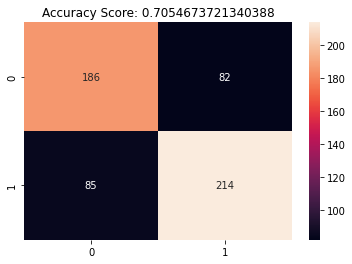

In [42]:
cm_def_model_1 = confusion_matrix(Y_test, Y_pred_def_model_lr)
acc_def_model_1 = accuracy_score(Y_test, Y_pred_def_model_lr)
sns.heatmap(cm_def_model_1, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_1))
plt.show()

In [43]:
print(classification_report(Y_test, Y_pred_def_model_lr))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.72      0.72       299

    accuracy                           0.71       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.71      0.71      0.71       567



# Support Vector Classifier SVC

In [45]:
# Define model and params for SVC

svc_model = SVC()

# Params
c_values_svc = [0.1, 0.5, 1.0,  1.5,  2.0, 10, 50, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale']
#degrees = [0, 1, 2, 3, 4, 5, 6]

In [47]:
# Define GridSearch

grid_svc = dict(kernel = kernel, gamma = gamma, C = c_values_svc)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3,  random_state=1)
grid_search_svc = GridSearchCV(estimator = svc_model,
                           param_grid = grid_svc,
                           n_jobs = -1,
                           cv = cv,
                           scoring = 'accuracy')

In [48]:
# Results

grid_results_svc = grid_search_svc.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Summarize Results

print("Best score: %f using %s" % (grid_results_svc.best_score_, grid_results_svc.best_params_))

Best score: 0.777939 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [53]:
def_model_svc = SVC(C=grid_results_svc.best_params_['C'],
                    gamma=grid_results_svc.best_params_['gamma'],
                    kernel=grid_results_svc.best_params_['kernel'])

In [54]:
def_model_svc.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=50)

In [55]:
Y_pred_def_model_svc = def_model_svc.predict(X_test)

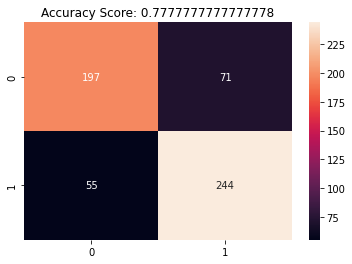

In [56]:
cm_def_model_1 = confusion_matrix(Y_test, Y_pred_def_model_svc)
acc_def_model_1 = accuracy_score(Y_test, Y_pred_def_model_svc)
sns.heatmap(cm_def_model_1, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_1))
plt.show()

In [57]:
print(classification_report(Y_test, Y_pred_def_model_svc))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       268
           1       0.77      0.82      0.79       299

    accuracy                           0.78       567
   macro avg       0.78      0.78      0.78       567
weighted avg       0.78      0.78      0.78       567



# XGB Classifier

In [12]:
# Define model and params for XGB Classifier V1

xgb_model = XGBClassifier()

# Params 
param_grid = {
    'n_estimators' : [10, 50, 100, 150],
    'max_depth' : [ 3, 5, 7, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'objective' : ['binary:logistic'],
    'eval_metric' : ['logloss', 'auc']
}

In [13]:
# Define GridSearch
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3,  random_state=1)
grid_search_xgb = GridSearchCV(estimator = xgb_model,
                           param_grid = param_grid,
                           n_jobs = -1,
                           cv = cv,
                           scoring = 'accuracy')

In [14]:
# Results

grid_results_xgb = grid_search_xgb.fit(X_train, Y_train)

In [15]:
# Summarize Results

print("Best score: %f using %s" % (grid_results_xgb.best_score_, grid_results_xgb.best_params_))

Best score: 0.813031 using {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'objective': 'binary:logistic'}


In [16]:
def_model_xgb = XGBClassifier(eval_metric = grid_results_xgb.best_params_['eval_metric'],
                              learning_rate = grid_results_xgb.best_params_['learning_rate'],
                              max_depth = grid_results_xgb.best_params_['max_depth'],
                              n_estimators = grid_results_xgb.best_params_['n_estimators'],
                              objective = grid_results_xgb.best_params_['objective'])

In [17]:
def_model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [18]:
Y_pred_def_model_xgb = def_model_xgb.predict(X_test)

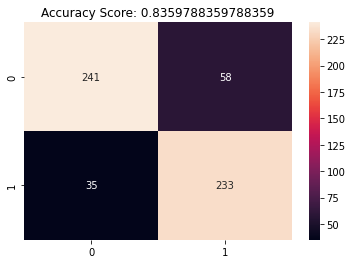

In [21]:
cm_def_model_1 = confusion_matrix(Y_test, Y_pred_def_model_xgb, labels=[1,0]) # Class 1:Negative, Class 0:Positive
acc_def_model_1 = accuracy_score(Y_test, Y_pred_def_model_xgb)
sns.heatmap(cm_def_model_1, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_1))
plt.show()

In [22]:
print(classification_report(Y_test, Y_pred_def_model_xgb))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       268
           1       0.87      0.81      0.84       299

    accuracy                           0.84       567
   macro avg       0.84      0.84      0.84       567
weighted avg       0.84      0.84      0.84       567



Interpretación de los resultados

Para la clase 0, el modelo tiene una precisión de 0.8, lo que significa que de todas las veces que el modelo predijo que una persona estaba activa en su trabajo, el 80% de las veces fue correcto. Además, el modelo tiene un recall de 0.87, lo que significa que de todas las personas que realmente estaban activas en su trabajo, el modelo pudo identificar correctamente el 87% de ellas.

Para la clase 1, el modelo tiene una precisión de 0.87, lo que significa que de todas las veces que el modelo predijo que una persona se había retirado del trabajo, el 87% de las veces fue correcto. Además, el modelo tiene un recall de 0.81, lo que significa que de todas las personas que realmente se habían retirado del trabajo, el modelo pudo identificar correctamente el 81% de ellas. 